WORLD操作入门

In [30]:
import librosa
import pyworld as pw
import librosa.display
from matplotlib import pyplot as plt
import soundfile
import argparse

In [22]:
filename = './data/demo.wav'
x, fs = soundfile.read(filename)

原始音频

<audio  controls="controls" src="./data/demo.wav" />

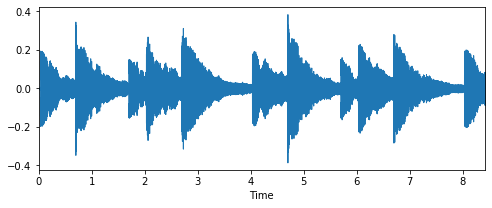

In [23]:
plt.figure(figsize=(8, 3))
librosa.display.waveplot(x, sr=fs)
plt.show()

In [39]:
class Args():
    pass
args = Args()
args.speed = 1
args.frame_period = 5.0

直接合成

In [49]:
_f0, t = pw.dio(x, fs, f0_floor=50.0, f0_ceil=600.0,
                channels_in_octave=2,
                frame_period=args.frame_period,
                speed=args.speed)
_sp = pw.cheaptrick(x, _f0, t, fs)
_ap = pw.d4c(x, _f0, t, fs)
_y = pw.synthesize(_f0, _sp, _ap, fs, args.frame_period)
soundfile.write('./data/demo_without_f0_refinement.wav', _y, fs)

<audio  controls="controls" src="./data/demo_without_f0_refinement.wav" />

加8度

In [51]:
_f0 = _f0 * 8
_y = pw.synthesize(_f0, _sp, _ap, fs, args.frame_period)
soundfile.write('./data/demo_with_f0_8.wav', _y, fs)

<audio  controls="controls" src="./data/demo_with_f0_8.wav" />